# ***THE SPARKS FOUNDATIONS***
## Data Science & Business Analytics Tasks
## TASK - 2 : Prediction using Unsupervised ML
### ***Name : Sudhanshu***

### * IMPORTING THE LIBRARIES 

In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.cluster import KMeans
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

### * DATA READING

In [2]:
## since we have already downloaded the data to a file, we can load the file...
data = pd.read_csv('Iris.csv')

In [3]:
## print the first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### * DROPING ID FROM DATA

In [4]:
data = data.drop('Id',axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### * SUMMARY OF DATA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.shape

(150, 5)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### * FINDING OPTIMUM CLUSTER FOR KMEANS

In [9]:
x = data.iloc[:,[0,1,2,3]].values

WCSS
 [680.8244000000001, 152.36870647733906, 78.94084142614601, 57.317873214285726, 46.56163015873017, 38.93096304967175, 34.19068792479663, 30.063874432733137, 27.842356060606065]


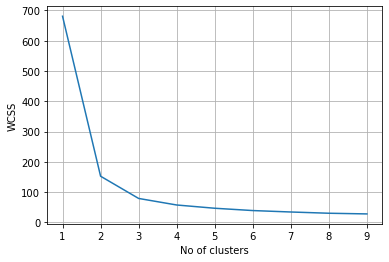

In [10]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,10): # i = no of clusters,
    m = KMeans(n_clusters=i,random_state=0)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,10)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### Inference Optimal number of clusters = 3

### * VISUALISING CLUSTERS

In [11]:
# since elbow occured at 3, hence the optimal number of clusters for the mall data is 3 

model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

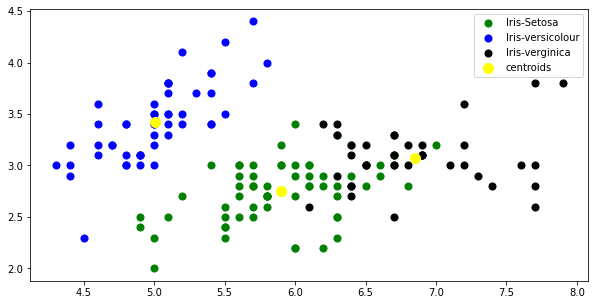

In [12]:
plt.figure(figsize = (10,5))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "Iris-Setosa")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Iris-versicolour")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Iris-verginica")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")

plt.legend()
plt.show()